# Libraries

In [1]:
import pandas as pd   
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np



# loading data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DATASETS/ML/P5/data_clean.csv")

In [3]:
# making sure columns are strings

cols = ['Title', 'Body', 'Tags', 'Body_clean', 'Title_clean', 'Tags_clean']

for col in cols:
  data[col] = data[col].astype("str")

# time serie

In [4]:
# converting to date
data["CreationDate"] = pd.to_datetime(data["CreationDate"] )
data["CreationDate"] = data["CreationDate"].dt.date

In [5]:
# getting starting date
min(data["CreationDate"])

datetime.date(2019, 1, 1)

In [6]:
# getting ending date
max(data["CreationDate"])

datetime.date(2021, 1, 24)

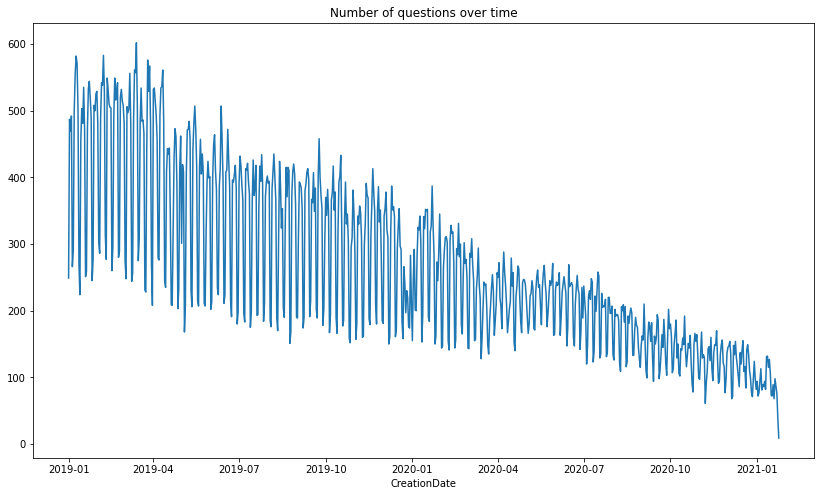

In [7]:
# graph of questions per days
plt.figure(figsize=(14,8))
data.value_counts("CreationDate").plot()
plt.title("Number of questions over time")
plt.show()

* Not overly surprising : question selected were score > 2. Older questions had more time to receive vote.

# word counts

In [8]:
# creating fuction for words counts for title, body and tags

def word_count(string):
  # Split the string into words
  words = string.split()

  # Return length of words list
  return len(words)

# applying fucntion   
data["body_words"] = data['Body_clean'].apply(word_count)
data["title_words"] = data['Title_clean'].apply(word_count)
data["tags_words"] = data['Tags_clean'].apply(word_count)

In [9]:
# getting tendencies for words counts
cols = ['body_words', 'title_words', 'tags_words']

data[cols].describe()

,body_words,title_words,tags_words
count,202861.000000,202861.000000,202861.000000
mean,150.741715,6.614480,4.277436
std,200.680904,2.374406,2.131873
min,1.000000,1.000000,1.000000
25%,55.000000,5.000000,3.000000
50%,96.000000,6.000000,4.000000
75%,171.000000,8.000000,6.000000
max,4560.000000,24.000000,17.000000


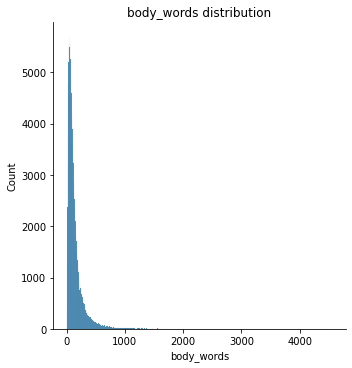

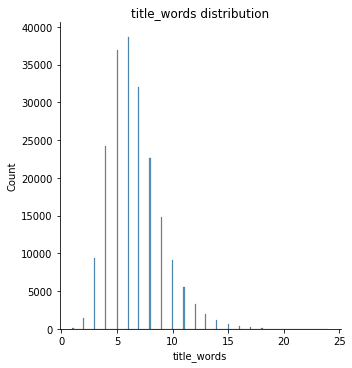

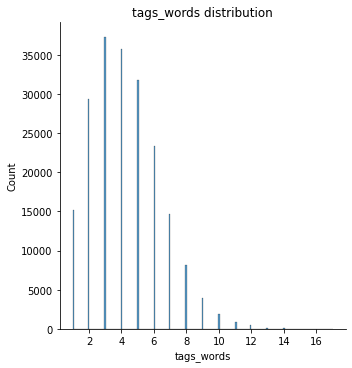

In [10]:
#Ploting words counts
for col in cols:
  sns.displot(x = col, data = data)
  plt.title(col + " distribution")
plt.show()

# Words frequency

## Tags

In [11]:
# getting all tags
Tags = data['Tags_clean'].apply(lambda x: x.split())
all_tags = [item for sublist in Tags.values for item in sublist]
len(all_tags)

867725

In [12]:
# getting unique tags
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

14966

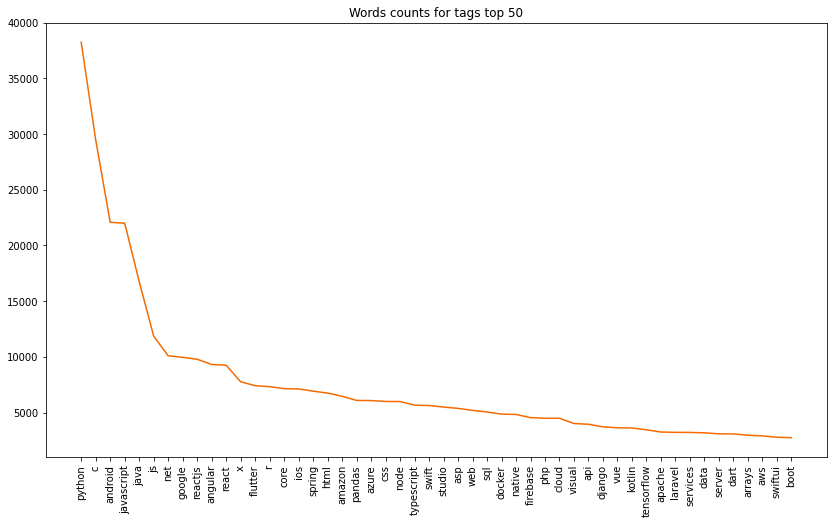

In [13]:
# getting tags frequency
flat_list = [item for sublist in Tags.values for item in sublist]
keywords = nltk.FreqDist(flat_list)

# ploting top 50 used tags
df = pd.DataFrame.from_dict(keywords, orient='index')
df.reset_index(inplace=True)
df.columns = ["vocab", "dist"]

df_top50 = df.sort_values("dist", ascending = False).head(50)

fig=plt.figure(figsize=(14, 8))
plt.plot(df_top50["vocab"], df_top50["dist"],color="#f56900")
plt.title("Words counts for tags top 50")
plt.xticks(rotation=90) 
plt.show()

In [14]:
def tags_to_words( raw_text ):
        
    words = raw_text.split()        

    meaningful_words = [w for w in words if w in meaningfull_tags]   
   
    return( " ".join( meaningful_words))

With cum_sum of 0.1 Number of tags: 17 Number of questions kept: 0.33
With cum_sum of 0.2 Number of tags: 60 Number of questions kept: 0.52
With cum_sum of 0.3 Number of tags: 80 Number of questions kept: 0.71
With cum_sum of 0.4 Number of tags: 131 Number of questions kept: 0.82
With cum_sum of 0.5 Number of tags: 221 Number of questions kept: 0.89
With cum_sum of 0.6 Number of tags: 388 Number of questions kept: 0.93
With cum_sum of 0.7 Number of tags: 709 Number of questions kept: 0.96
With cum_sum of 0.8 Number of tags: 1353 Number of questions kept: 0.98
With cum_sum of 0.9 Number of tags: 2881 Number of questions kept: 0.99


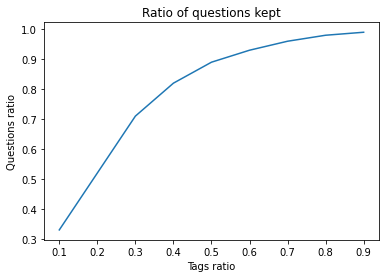

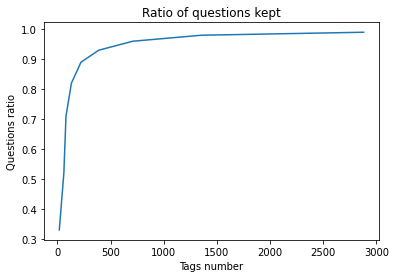

In [15]:
# computing cumulative sum of proportion for each tags used
df["cum_sum"] = np.cumsum(df["dist"]/np.sum(df["dist"]))

cum_sum = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

questions_ratio = []
tags = []
meaningfull_tags = []

# looping through cum sum and compute nb of question kept
for s in cum_sum:
  nb_tags = len(df[df['cum_sum'] < s])
  meaningfull_tags = list(df[df['cum_sum'] < s]["vocab"])

  num = len(data["Tags_clean"])

  clean_text = []

  for i in range( 0, num ):
      clean_text.append( tags_to_words( data["Tags_clean"][i] ) )

  nb_of_nan = pd.DataFrame(clean_text).replace("", np.nan).isna().sum().sum()

  ratio_question = round((num - nb_of_nan) / num,2)

  questions_ratio.append(ratio_question)
  tags.append(nb_tags)

  print("With cum_sum of",s,"Number of tags:",nb_tags, "Number of questions kept:",ratio_question )

#Plotting
plt.plot(cum_sum, questions_ratio)
plt.xlabel("Tags ratio")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()
plt.plot(tags, questions_ratio)
plt.xlabel("Tags number")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()

In [16]:
# saving tags dictionnary
meaningfull_tags = list(df[df['cum_sum'] < 0.5]["vocab"])

In [17]:
# Removing tags not included in most importants tags used
num = len(data["Tags_clean"])

clean_text = []

for i in range( 0, num ):
    
    clean_text.append( tags_to_words( data["Tags_clean"][i] ) )

data["Tags_clean"] = clean_text

In [18]:
# dropping question with empty tags
data.replace("", np.nan, inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [19]:
data.isna().sum()

Title           0
Body            0
Tags            0
CreationDate    0
Body_clean      0
Title_clean     0
Tags_clean      0
body_words      0
title_words     0
tags_words      0
dtype: int64

## title

In [20]:
# getting all words used
Title_clean = data['Title_clean'].apply(lambda x: x.split())
all_tags = [item for sublist in Title_clean.values for item in sublist]
len(all_tags)

1198957

In [21]:
# getting unique words used
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

40742

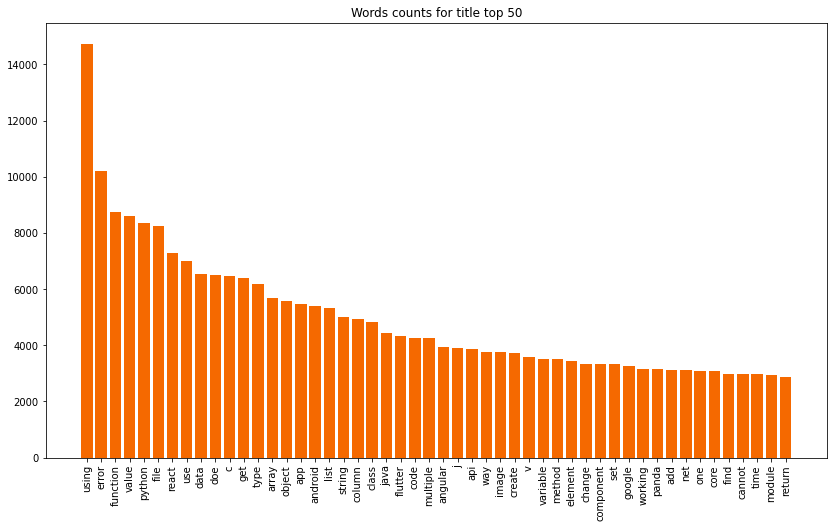

In [22]:
# getting words frequency
flat_list = [item for sublist in Title_clean.values for item in sublist]
keywords = nltk.FreqDist(flat_list)

# plotting top 50 words used in title
df = pd.DataFrame.from_dict(keywords, orient='index')
df.reset_index(inplace=True)
df.columns = ["vocab", "dist"]

df_top50 = df.sort_values("dist", ascending = False).head(50)

fig=plt.figure(figsize=(14, 8))
plt.bar(df_top50["vocab"], df_top50["dist"],color="#f56900")
plt.title("Words counts for title top 50")
plt.xticks(rotation=90) 
plt.show()

In [23]:
def title_to_words( raw_text ):
        
    words = raw_text.split()        

    meaningful_words = [w for w in words if w in meaningfull_title]   
   
    return( " ".join( meaningful_words))

With cum_sum of 0.1 Number of words: 80 Number of questions kept: 0.47
With cum_sum of 0.2 Number of words: 189 Number of questions kept: 0.72
With cum_sum of 0.3 Number of words: 294 Number of questions kept: 0.85
With cum_sum of 0.4 Number of words: 492 Number of questions kept: 0.93
With cum_sum of 0.5 Number of words: 734 Number of questions kept: 0.96
With cum_sum of 0.6 Number of words: 1069 Number of questions kept: 0.98
With cum_sum of 0.7 Number of words: 1643 Number of questions kept: 0.99
With cum_sum of 0.8 Number of words: 2761 Number of questions kept: 1.0
With cum_sum of 0.9 Number of words: 5885 Number of questions kept: 1.0


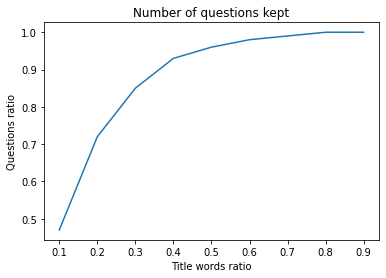

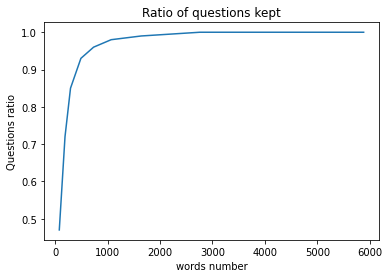

In [24]:
# computing cumulative sum of proportion for each words used
df["cum_sum"] = np.cumsum(df["dist"]/np.sum(df["dist"]))

cum_sum = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

questions_ratio = []
words = []
meaningfull_title = []

# looping and compute question covered
for s in cum_sum:
  nb_words = len(df[df['cum_sum'] < s])
  meaningfull_title = list(df[df['cum_sum'] < s]["vocab"])

  num = len(data["Title_clean"])

  clean_text = []

  for i in range( 0, num ):
      
      clean_text.append( title_to_words( data["Title_clean"][i] ) )

  nb_of_nan = pd.DataFrame(clean_text).replace("", np.nan).isna().sum().sum()

  ratio_question = round((num - nb_of_nan) / num,2)

  questions_ratio.append(ratio_question)
  words.append(nb_words)

  print("With cum_sum of",s,"Number of words:",nb_words, "Number of questions kept:",ratio_question )

# plotting
plt.plot(cum_sum, questions_ratio)
plt.xlabel("Title words ratio")
plt.ylabel("Questions ratio")
plt.title("Number of questions kept")
plt.show()
plt.plot(words, questions_ratio)
plt.xlabel("words number")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()

## Body

In [25]:
# getting all words used in body
Body_clean = data['Body_clean'].apply(lambda x: x.split())
all_words = [item for sublist in Body_clean.values for item in sublist]
len(all_words)

27770281

In [26]:
# getting all unique words used in body
my_set = set(all_words)
unique_words = list(my_set)
len(unique_words)

536542

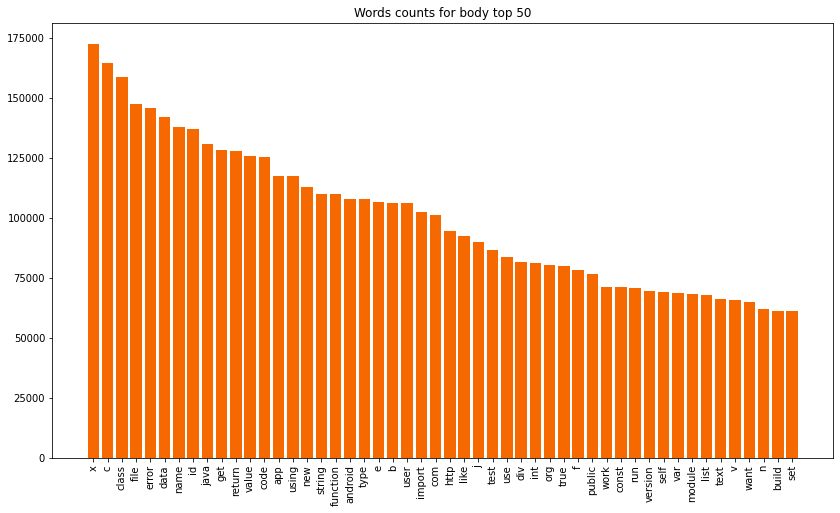

In [27]:
# getting words frequency
flat_list = [item for sublist in Body_clean.values for item in sublist]
keywords = nltk.FreqDist(flat_list)

# plotting top 50 words used in body
df = pd.DataFrame.from_dict(keywords, orient='index')
df.reset_index(inplace=True)
df.columns = ["vocab", "dist"]

df_top50 = df.sort_values("dist", ascending = False).head(50)

fig=plt.figure(figsize=(14, 8))
plt.bar(df_top50["vocab"], df_top50["dist"],color="#f56900")
plt.title("Words counts for body top 50")
plt.xticks(rotation=90) 
plt.show()

In [28]:
def body_to_words( raw_text ):
        
    words = raw_text.split()        

    meaningful_words = [w for w in words if w in meaningfull_body]   
   
    return( " ".join( meaningful_words))

With cum_sum of 0.1 Number of words: 106 Number of questions kept: 0.97
With cum_sum of 0.2 Number of words: 232 Number of questions kept: 1.0
With cum_sum of 0.3 Number of words: 439 Number of questions kept: 1.0
With cum_sum of 0.4 Number of words: 613 Number of questions kept: 1.0
With cum_sum of 0.5 Number of words: 976 Number of questions kept: 1.0
With cum_sum of 0.6 Number of words: 1508 Number of questions kept: 1.0
With cum_sum of 0.7 Number of words: 2740 Number of questions kept: 1.0
With cum_sum of 0.8 Number of words: 6445 Number of questions kept: 1.0
With cum_sum of 0.9 Number of words: 27204 Number of questions kept: 1.0


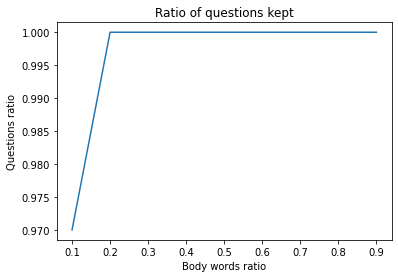

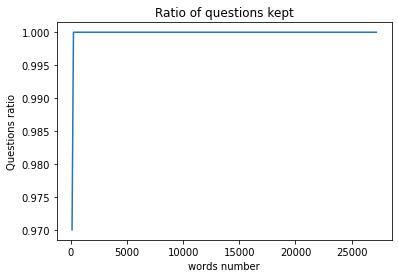

In [29]:
# computing cumulative sum of proportion for each words used
df["cum_sum"] = np.cumsum(df["dist"]/np.sum(df["dist"]))

cum_sum = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

questions_ratio = []
words = []
meaningfull_body = []

# looping and compute question covered
for s in cum_sum:
  nb_words = len(df[df['cum_sum'] < s])
  meaningfull_body = list(df[df['cum_sum'] < s]["vocab"])

  num = len(data["Body_clean"])

  clean_text = []

  for i in range( 0, num ):
      
      clean_text.append( body_to_words( data["Body_clean"][i] ) )

  nb_of_nan = pd.DataFrame(clean_text).replace("", np.nan).isna().sum().sum()

  ratio_question = round((num - nb_of_nan) / num,2)

  questions_ratio.append(ratio_question)
  words.append(nb_words)

  print("With cum_sum of",s,"Number of words:",nb_words, "Number of questions kept:",ratio_question )

# plotting
plt.plot(cum_sum, questions_ratio)
plt.xlabel("Body words ratio")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()
plt.plot(words, questions_ratio)
plt.xlabel("words number")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()

# full

In [30]:
data["full"]= data["Title_clean"]+ data["Body_clean"]
data["full"]

0         rearrange subplots one underneathtrying code t...
1         perl use junction inside regex interpolationso...
2         set size rotate image jekyllset size image jek...
3         scons appending random macro definition osxcom...
4         pyenv failed download existing version pythonr...
                                ...                        
179948    doe return statement two recursive call worktr...
179949    subplots plotly loopplease help need get subpl...
179950    iteration recurrent problem pythonasked find t...
179951    doe statement check cannot compared nullptrsta...
179952    keep multiple copy large dataset memory ctldr ...
Name: full, Length: 179953, dtype: object

In [31]:
# getting all words used in body
Full_clean = data["full"].apply(lambda x: x.split())
all_words = [item for sublist in Full_clean.values for item in sublist]
len(all_words)

28789285

In [32]:
# getting all unique words used in body
my_set = set(all_words)
unique_words = list(my_set)
len(unique_words)

646100

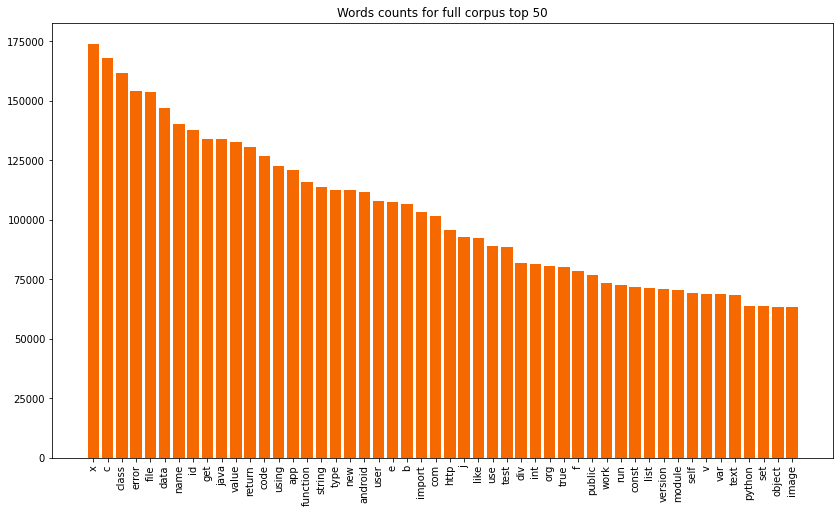

In [33]:
# getting words frequency
flat_list = [item for sublist in Full_clean.values for item in sublist]
keywords = nltk.FreqDist(flat_list)

# plotting top 50 words used in body
df = pd.DataFrame.from_dict(keywords, orient='index')
df.reset_index(inplace=True)
df.columns = ["vocab", "dist"]

df_top50 = df.sort_values("dist", ascending = False).head(50)

fig=plt.figure(figsize=(14, 8))
plt.bar(df_top50["vocab"], df_top50["dist"],color="#f56900")
plt.title("Words counts for full corpus top 50")
plt.xticks(rotation=90) 
plt.show()

In [34]:
def full_to_words( raw_text ):
        
    words = raw_text.split()        

    meaningful_words = [w for w in words if w in meaningfull_full]   
   
    return( " ".join( meaningful_words))

With cum_sum of 0.1 Number of words: 110 Number of questions kept: 0.98
With cum_sum of 0.2 Number of words: 244 Number of questions kept: 1.0
With cum_sum of 0.3 Number of words: 445 Number of questions kept: 1.0
With cum_sum of 0.4 Number of words: 636 Number of questions kept: 1.0
With cum_sum of 0.5 Number of words: 1035 Number of questions kept: 1.0


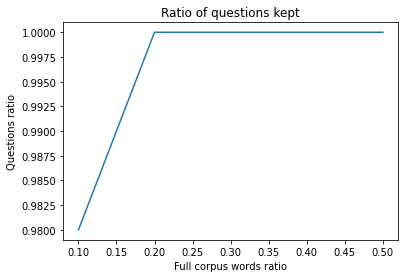

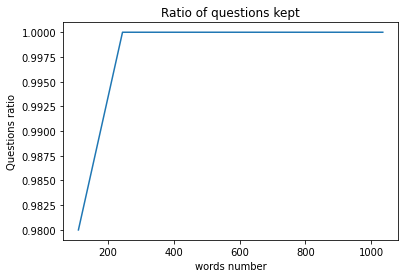

In [35]:
# computing cumulative sum of proportion for each words used
df["cum_sum"] = np.cumsum(df["dist"]/np.sum(df["dist"]))

cum_sum = [0.1,0.2,0.3,0.4,0.5]

questions_ratio = []
words = []
meaningfull_body = []

# looping and compute question covered
for s in cum_sum:
  nb_words = len(df[df['cum_sum'] < s])
  meaningfull_full = list(df[df['cum_sum'] < s]["vocab"])

  num = len(data["full"])

  clean_text = []

  for i in range( 0, num ):
      
      clean_text.append( full_to_words( data["full"][i] ) )

  nb_of_nan = pd.DataFrame(clean_text).replace("", np.nan).isna().sum().sum()

  ratio_question = round((num - nb_of_nan) / num,2)

  questions_ratio.append(ratio_question)
  words.append(nb_words)

  print("With cum_sum of",s,"Number of words:",nb_words, "Number of questions kept:",ratio_question )

# plotting
plt.plot(cum_sum, questions_ratio)
plt.xlabel("Full corpus words ratio")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()
plt.plot(words, questions_ratio)
plt.xlabel("words number")
plt.ylabel("Questions ratio")
plt.title("Ratio of questions kept")
plt.show()

In [36]:
# saving data for modeling
cols = ['Body_clean', 'Title_clean', 'Tags_clean',"full"]
data_model = data[cols]
data_model.to_csv( "/content/drive/MyDrive/DATASETS/ML/P5/data_model.csv",index=False)